In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
#X: MxN
#y: M
class MultinomialLogisticRegression:
    def __init__(self, C, alpha = 0.01, lam = 1, n_iters = 500):
        self.C = C
        self.alpha = alpha
        self.lam = lam
        self.n_iters = n_iters
        
    def fit(self, X, y):
        M = X.shape[0]
        #intercept
        X = np.hstack([np.ones((M,1)), X])
        N = X.shape[1]
        
        #y:M -> MxC
        #one hot encoding for y
        y = pd.Series(y)
        y = pd.get_dummies(y).to_numpy()
        
        self.W = np.zeros((N,self.C))
        
        for i in range(self.n_iters):
            if(i>44 or i%5 == 0):
                print(self.W)
            
            grad = (X.T @ (np.exp(X @ self.W) / np.sum(np.exp(X @ self.W), axis=1)[np.newaxis,1] - y)) / M \
                + (self.lam * np.linalg.norm(self.W))
            grad[:,self.C-1] = 0
            self.W -= self.alpha * grad
    
    def predict(self, X):
        M = X.shape[0]
        X = np.hstack([np.ones((M,1)), X]) 
        
        return this.W

In [166]:
model = MultinomialLogisticRegression(C = 2)
model.fit(X, y)
model.W

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[-0.000495    0.        ]
 [-0.00246663  0.        ]
 [-0.02555037  0.        ]]
[[-0.0022599   0.        ]
 [-0.00581823  0.        ]
 [-0.05139056  0.        ]]
[[-0.00535153  0.        ]
 [-0.01002975  0.        ]
 [-0.07752484  0.        ]]
[[-0.0098309   0.        ]
 [-0.01507976  0.        ]
 [-0.10395817  0.        ]]
[[-0.01576344  0.        ]
 [-0.02095002  0.        ]
 [-0.13069623  0.        ]]
[[-0.02321928  0.        ]
 [-0.02762516  0.        ]
 [-0.15774546  0.        ]]
[[-0.03227353  0.        ]
 [-0.03509232  0.        ]
 [-0.18511308  0.        ]]
[[-0.04300657  0.        ]
 [-0.04334088  0.        ]
 [-0.21280726  0.        ]]
[[-0.05550433  0.        ]
 [-0.05236225  0.        ]
 [-0.24083724  0.        ]]
[[-0.05822362  0.        ]
 [-0.05425863  0.        ]
 [-0.24648443  0.        ]]
[[-0.06101791  0.        ]
 [-0.0561856   0.        ]
 [-0.25214556  0.        ]]
[[-0.06388798  0.        ]
 [-0.05814312  0.        ]
 [-0.25782072  0

array([[-132.96545182,    0.        ],
       [ -11.33130502,    0.        ],
       [ -48.94266535,    0.        ]])

(3,)
(2,)
[-1.90643243 -3.52708661]


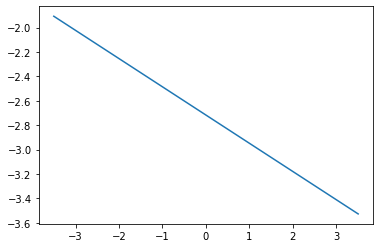

In [167]:
lineX = np.array([-3.5, 3.5])
print(model.W[:,0].shape)
print(lineX.shape)
lineY = (-model.W[0,0] - model.W[1,0]*lineX)/model.W[2,0]
print(lineY)
plt.plot(lineX, lineY)

Testing on toy data

In [137]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=35)
X[0:5]

array([[-0.85586586,  1.6271912 ],
       [ 2.02349903, -0.33710054],
       [-3.43329393, -2.12398587],
       [-2.36864907, -1.41423318],
       [ 1.11542678,  0.06434381]])

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 35)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

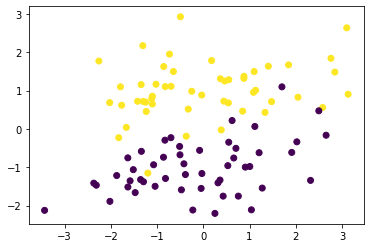

In [145]:
plt.scatter(X[:,0], X[:,1], c = y)